<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/M3_lab51a_BoW_Word2vec_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text data Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Bag of Words
- term-document matrix (TDM)
- tfidf matrix

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
corpus = [
    'This is the first document',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

In [5]:
vect = CountVectorizer()
X = vect.fit_transform(corpus)

In [ ]:
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [7]:
print(X.toarray())
print(vect.get_feature_names_out())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [8]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names_out())

[[0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]
 [0.  0.7 0.  0.3 0.  0.5 0.3 0.  0.3]
 [0.5 0.  0.  0.3 0.5 0.  0.3 0.5 0.3]
 [0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [11]:
vect = TfidfVectorizer(ngram_range=(1,2))
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names_out())

[[0.  0.  0.3 0.  0.4 0.4 0.3 0.3 0.  0.  0.  0.  0.3 0.4 0.  0.  0.  0.
  0.3 0.  0.4 0. ]
 [0.  0.  0.5 0.4 0.  0.  0.2 0.2 0.  0.  0.4 0.4 0.2 0.  0.4 0.  0.  0.
  0.2 0.4 0.  0. ]
 [0.4 0.4 0.  0.  0.  0.  0.2 0.2 0.  0.4 0.  0.  0.2 0.  0.  0.4 0.4 0.4
  0.2 0.  0.3 0. ]
 [0.  0.  0.3 0.  0.3 0.3 0.2 0.  0.4 0.  0.  0.  0.2 0.3 0.  0.  0.  0.
  0.2 0.  0.  0.4]]
['and' 'and this' 'document' 'document is' 'first' 'first document' 'is'
 'is the' 'is this' 'one' 'second' 'second document' 'the' 'the first'
 'the second' 'the third' 'third' 'third one' 'this' 'this document'
 'this is' 'this the']


## practical example - spam mail

In [12]:
!curl -L https://bit.ly/2WC9nvn -o spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0    473      0 --:--:-- --:--:-- --:--:--   474
100    17    0    17    0     0     20      0 --:--:-- --:--:-- --:--:--     0
100   297  100   297    0     0    240      0  0:00:01  0:00:01 --:--:--   240
100  488k  100  488k    0     0   238k      0  0:00:02  0:00:02 --:--:-- 2531k


In [13]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head(3)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [14]:
sms.shape

(5574, 2)

In [15]:
sms.columns = ['category', 'text']
sms.head(3)

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [16]:
sms['category'].value_counts()

ham     4827
spam     747
Name: category, dtype: int64

<Axes: ylabel='category'>

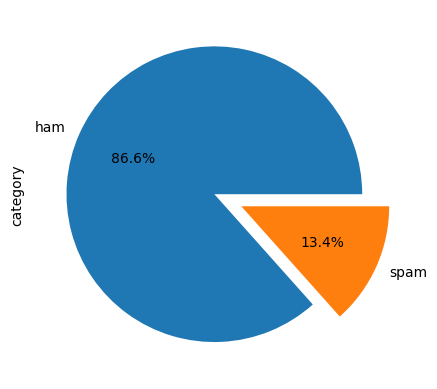

In [17]:
sms['category'].value_counts().plot(kind='pie', explode=[0, 0.2], autopct='%1.1f%%')

In [18]:
sms.head(3).append(sms.tail(3))

<ipython-input-18-ad96a0b0fdad>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sms.head(3).append(sms.tail(3))


,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [19]:
sms_corpus = sms['text']
vect = CountVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
X.shape

(5574, 837)

In [20]:
# 5 most frequently appeared words
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
iidx
[vect.get_feature_names_out()[i] for i in iidx]

['ur', 'just', 'gt', 'lt', 'ok']

In [23]:
vect = TfidfVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
print([vect.get_feature_names_out()[i] for i in iidx])
print([X.toarray().sum(0)[i].round(2) for i in iidx])

['ok', 'just', 'll', 'ur', 'come']
[122.07, 106.16, 96.57, 91.58, 87.15]


### word cloud

In [24]:
spam_sms = sms[sms["category"] == "spam"]["text"]
ham_sms = sms[sms["category"] == "ham"]["text"]

spam_words = []
ham_words = []

In [27]:
spam_sms.shape, ham_sms.shape

((747,), (4827,))

In [28]:
!pip install nltk

In [29]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
for i in range(spam_sms.shape[0]):
    msg = spam_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg)
                              if word.lower() not in stopwords.words('english') and
                                 word.lower().isalpha()]
    spam_words = spam_words + words

In [31]:
len(spam_words)

9447

In [32]:
!pip install wordcloud

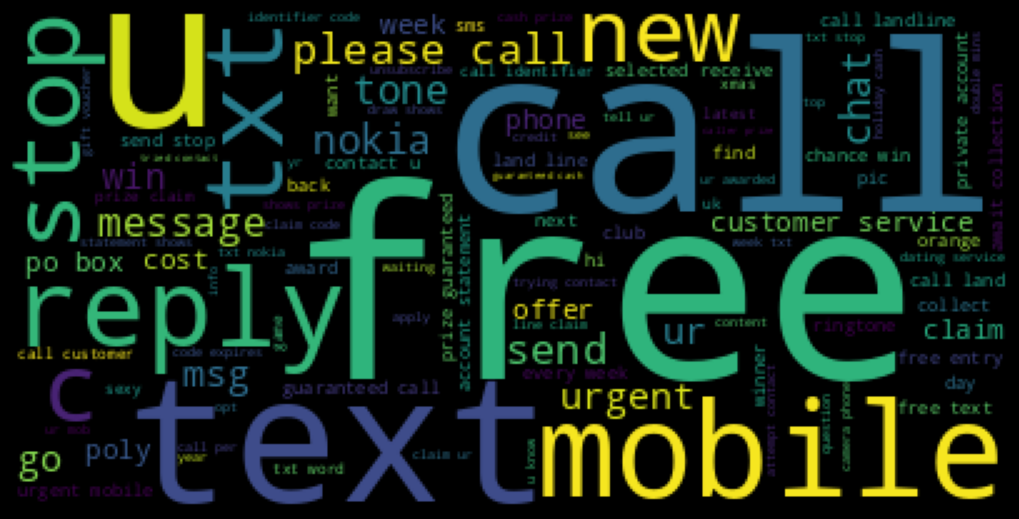

In [33]:
from wordcloud import WordCloud

wc = WordCloud(width=400, height=200)
spam_wordcloud = wc.generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

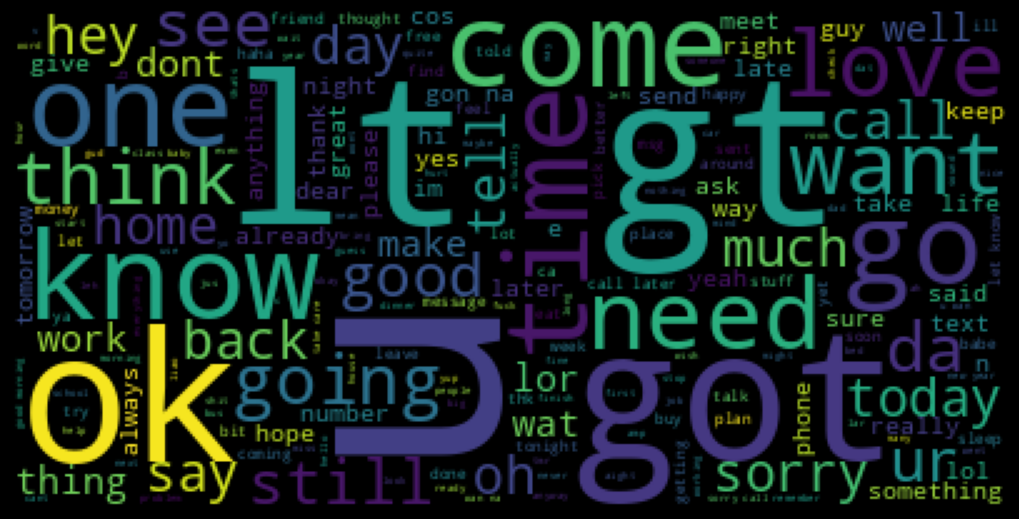

In [35]:
for i in range(ham_sms.values.shape[0]):
    msg = ham_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg)
                               if word.lower() not in stopwords.words('english') and
                                  word.lower().isalpha()]
    ham_words = ham_words + words

wc = WordCloud(width=400, height=200)
ham_wordcloud = wc.generate(" ".join(ham_words))

plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Word Embedding with Word2Vec
- word vector

In [36]:
!pip install gensim

In [48]:
!pip show gensim  # now we are using Gensim ver 4.x in Colab

Name: gensim
Version: 4.3.1
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy, smart-open
Required-by: 


- changes from 3.0 to 4.0: https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
  - size -> vector_size
  - index2word and index2entity -> index_to_key
  - vocab[dict] -> key_to_index[dict]
  - most_similar(), wmdistance(), doesnt_match(), similarity(), & others moved to KeyedVectors (model.wv)

In [40]:
from gensim.models.word2vec import Word2Vec

In [84]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

model = Word2Vec(sentences, min_count=1, vector_size=5)   # it automatically fit the model

In [86]:
print(model)

Word2Vec<vocab=14, vector_size=5, alpha=0.025>


In [87]:
print(model.wv.index_to_key)
print(model.wv.key_to_index)

['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
{'sentence': 0, 'the': 1, 'is': 2, 'this': 3, 'final': 4, 'and': 5, 'more': 6, 'one': 7, 'another': 8, 'yet': 9, 'second': 10, 'word2vec': 11, 'for': 12, 'first': 13}


In [89]:
model.wv['sentence','this']

array([[-0.01072454,  0.00472863,  0.10206699,  0.18018547, -0.186059  ],
       [-0.03632035,  0.0575316 ,  0.01983747, -0.1657043 , -0.18897636]],
      dtype=float32)

In [64]:
model.wv[words]

array([[-0.01072454,  0.00472863,  0.10206699,  0.18018547, -0.186059  ],
       [-0.14233617,  0.12917745,  0.17945977, -0.10030856, -0.07526743],
       [ 0.1476101 , -0.03066943, -0.09073226,  0.13108103, -0.09720321],
       [-0.03632035,  0.0575316 ,  0.01983747, -0.1657043 , -0.18897636],
       [ 0.14623532,  0.10140524,  0.13515386,  0.01525731,  0.12701781],
       [-0.06810732, -0.01892803,  0.11537147, -0.15043275, -0.07872207],
       [-0.15023164, -0.01860085,  0.19076237, -0.14638333, -0.04667537],
       [-0.03875482,  0.16154873, -0.11861791,  0.00090325, -0.09507468],
       [-0.192071  ,  0.10014586, -0.17519172, -0.0878365 , -0.000702  ],
       [-0.00594484, -0.15322231,  0.19228637,  0.09963708,  0.18467292],
       [-0.16315834,  0.08991597, -0.08274152,  0.01649072,  0.16997239],
       [-0.08924353,  0.09035001, -0.1357392 , -0.07096978,  0.18797016],
       [-0.03155305,  0.00642743, -0.08281259, -0.15365377, -0.03016016],
       [ 0.0493959 , -0.01776054,  0.1

In [65]:
# dim 5 --> dim 2  (dimension reduction)
from sklearn.decomposition import PCA


In [68]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [69]:
result

array([[ 0.15687943,  0.0738043 ],
       [ 0.00975147,  0.16295762],
       [ 0.07901797, -0.07940459],
       [-0.06276723,  0.20023055],
       [ 0.15711927, -0.12162255],
       [ 0.03085482,  0.14383474],
       [ 0.05365549,  0.160029  ],
       [-0.1407799 ,  0.00701803],
       [-0.2551937 , -0.02434052],
       [ 0.26279026, -0.16265598],
       [-0.12857188, -0.17765588],
       [-0.16851805, -0.18855797],
       [-0.10917113,  0.02707589],
       [ 0.11493322, -0.02071255]], dtype=float32)

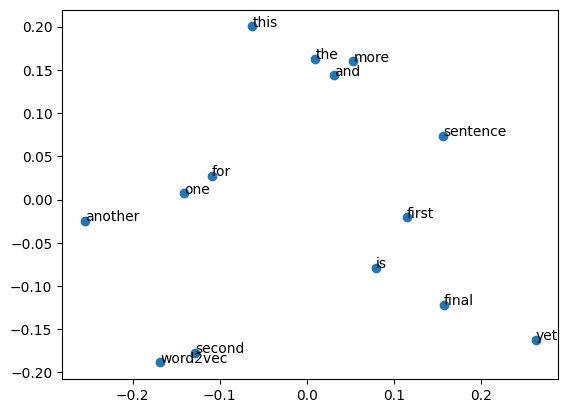

In [71]:
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [72]:
model.wv[words]

array([[-0.01072454,  0.00472863,  0.10206699,  0.18018547, -0.186059  ],
       [-0.14233617,  0.12917745,  0.17945977, -0.10030856, -0.07526743],
       [ 0.1476101 , -0.03066943, -0.09073226,  0.13108103, -0.09720321],
       [-0.03632035,  0.0575316 ,  0.01983747, -0.1657043 , -0.18897636],
       [ 0.14623532,  0.10140524,  0.13515386,  0.01525731,  0.12701781],
       [-0.06810732, -0.01892803,  0.11537147, -0.15043275, -0.07872207],
       [-0.15023164, -0.01860085,  0.19076237, -0.14638333, -0.04667537],
       [-0.03875482,  0.16154873, -0.11861791,  0.00090325, -0.09507468],
       [-0.192071  ,  0.10014586, -0.17519172, -0.0878365 , -0.000702  ],
       [-0.00594484, -0.15322231,  0.19228637,  0.09963708,  0.18467292],
       [-0.16315834,  0.08991597, -0.08274152,  0.01649072,  0.16997239],
       [-0.08924353,  0.09035001, -0.1357392 , -0.07096978,  0.18797016],
       [-0.03155305,  0.00642743, -0.08281259, -0.15365377, -0.03016016],
       [ 0.0493959 , -0.01776054,  0.1

In [74]:
model.wv.most_similar('word2vec')

[('second', 0.8888220191001892),
 ('another', 0.7012775540351868),
 ('for', 0.4032687842845917),
 ('one', 0.26315248012542725),
 ('final', 0.007924018427729607),
 ('the', -0.0879688486456871),
 ('yet', -0.13303133845329285),
 ('more', -0.15925802290439606),
 ('first', -0.22303269803524017),
 ('this', -0.2520391643047333)]

In [78]:
model.wv.similarity('sentence', 'word2vec')

-0.7897249

## Pre-trained Word2Vec
- GoogleNews-vectors-negative300.bin
- Its size is too big (bigger than 1.6 GB), and it may not possible to download it. Try Glove instead.

In [79]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [80]:
!wget -P ./ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
EMBEDDING_FILE = './GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

--2023-09-07 05:26:16--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.197.56, 52.217.10.62, 52.217.207.112, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.197.56|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-09-07 05:26:16 ERROR 404: Not Found.



In [ ]:
v_apple = word_vectors["apple"]
v_mango = word_vectors["mango"]
print(v_apple.shape)
print(v_mango.shape)
cosine_similarity([v_mango],[v_apple])

In [ ]:
words = ["soccer", "football", "baseball", "volleyball", "basketball", "tennis",
         "persimmon", "softball", "apple", "hockey", "orange", "pear", "strawberry",
         "eat", "drink", "taste", "talk", "speak", "study", "research", "have", "take"]
mat = word_vectors[words]
mat.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(mat)
xs = xys[:,0]
ys = xys[:,1]

plt.figure(figsize=(12,6))
plt.scatter(xs, ys)

for i, word in enumerate(words):
    plt.annotate(word, xy=(xs[i], ys[i]), rotation=30)
plt.show()

In [ ]:
import numpy as np
def odd_one_out(words):

    all_word_vectors = [word_vectors[w] for w in words]
    avg_vector = np.mean(all_word_vectors,axis=0)
    #print(avg_vector.shape)

    odd_one_out = None
    min_similarity = 1.0

    for w in words:
        sim = cosine_similarity([word_vectors[w]],[avg_vector])
        if sim < min_similarity:
            min_similarity = sim
            odd_one_out = w

        print("Similairy btw %s and avg vector is %.2f"%(w,sim))

    return odd_one_out

In [ ]:
pred=[]
import pandas as pd
import numpy as np
dfx = pd.read_csv('https://raw.githubusercontent.com/shankygupta79/GoogleCollabFiles/master/OddOne.csv').values
for i in range(4,8):
    a=dfx[i]
    a=a.reshape(-1)
    pred.append(odd_one_out(a))

print(pred)

In [ ]:
dfx

## pre-trained Glove
- glove-twitter-25
  - GloVe embeddings trained on a Twitter dataset
  - based on 2B tweets, 27B tokens, 1.2M vocab, uncased
  - dimensionality 25

In [83]:
import gensim.downloader as api

glove_model = api.load('glove-twitter-25')
sample_glove_embedding=glove_model['computer']

[===============================================---] 95.7% 100.3/104.8MB downloaded


In [91]:
sample_glove_embedding

array([ 0.64005 , -0.019514,  0.70148 , -0.66123 ,  1.1723  , -0.58859 ,
        0.25917 , -0.81541 ,  1.1708  ,  1.1413  , -0.15405 , -0.11369 ,
       -3.8414  , -0.87233 ,  0.47489 ,  1.1541  ,  0.97678 ,  1.1107  ,
       -0.14572 , -0.52013 , -0.52234 , -0.92349 ,  0.34651 ,  0.061939,
       -0.57375 ], dtype=float32)

In [96]:
words = ["soccer", "football", "baseball", "volleyball", "basketball", "tennis",
         "persimmon", "softball", "apple", "hockey", "orange", "pear", "strawberry",
         "eat", "drink", "taste", "talk", "speak", "study", "research", "have", "take",]
mat = glove_model[words]
mat.shape

(22, 25)

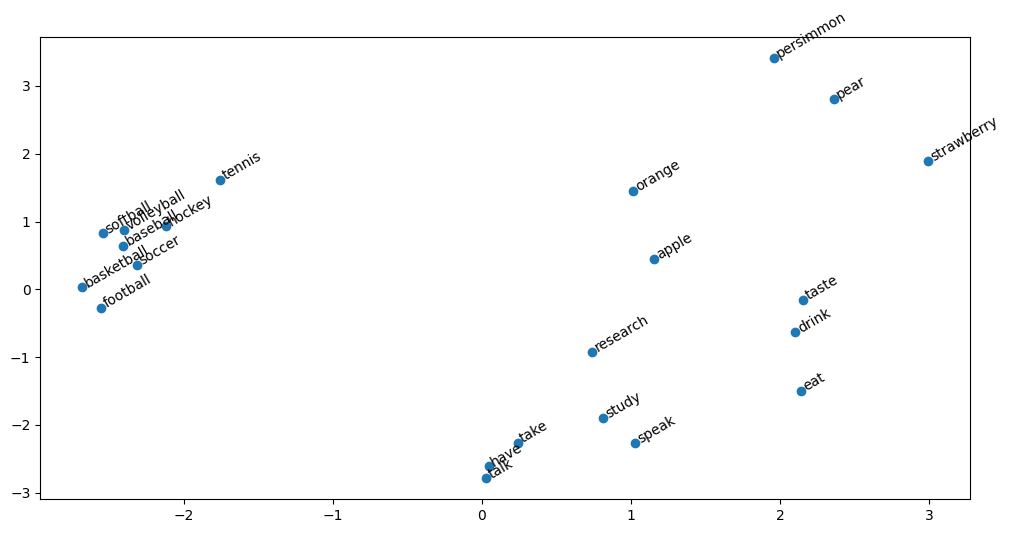

In [97]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(mat)
xs = xys[:,0]
ys = xys[:,1]

plt.figure(figsize=(12,6))
plt.scatter(xs, ys)

for i, word in enumerate(words):
    plt.annotate(word, xy=(xs[i], ys[i]), rotation=30)
plt.show()

- difference between Glove and Word2Vec
  - Both word2vec and glove enable us to represent a word in the form of a vector (often called embedding).
  - They are the two most popular algorithms for word embeddings that bring out the semantic similarity of words that captures different facets of the meaning of a word.
  - Word2vec embeddings are based on training a shallow **feedforward neural network** while glove embeddings are learnt based on **matrix factorization** techniques.
  - Glove model is based on leveraging **global** word to word co-occurance counts leveraging the entire corpus.
  - Word2vec on the other hand leverages co-occurance within **local** context (neighbouring words).
  - In practice, however, both these models give similar results for many tasks.
  - Factors such as the dataset on which these models are trained, length of the vectors and so on seem to have a bigger impact than the models themselves.